In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing DataSet

In [2]:
#loading the data to pandas object
path='./original_dataset.csv'
df=pd.read_csv(path,header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
#creating list of column name provided to us in project_description.names
columns_name=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']

In [4]:
#allocating the name to to columns of df
df.columns=columns_name

In [5]:
df.shape

(406, 9)

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


# Data wrangling

In [7]:
#finding total number of nan values
df.isna().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [9]:
#droping the rows with nan value of mpg as this is the attribute we want to predict
#and we van not assume the values of dependent variable
df.dropna(subset=['mpg'],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

Text(0.5, 1.0, 'Skwedness of Horsepower')

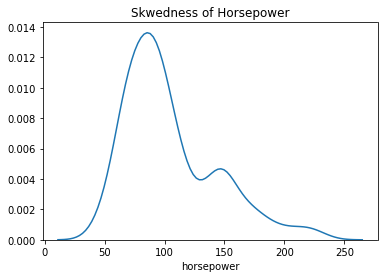

In [10]:
#distplot to find the skwedness of horsepower
sns.distplot(df['horsepower'],hist=False)
plt.title("Skwedness of Horsepower")

In [11]:
print("Mean of horsepower is",(df['horsepower'].mean(skipna=True)))
print("Median of horsepower is",(df['horsepower'].median(skipna=True)))

Mean of horsepower is 104.46938775510205
Median of horsepower is 93.5


In [12]:
#replacing the nan values of horsepower with its median
df['horsepower'].replace(np.nan,df['horsepower'].median(skipna=True),inplace=True)

In [13]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

# Data Analysis using Data Visualization 

In [14]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [15]:
df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

Text(0.5, 1.0, 'cylinder vs mpg')

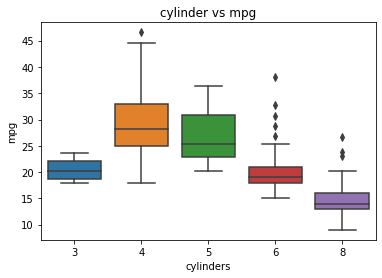

In [16]:
sns.boxplot(x='cylinders',y='mpg',data=df)
plt.title("cylinder vs mpg")

This plot shows that Number of Cylinders has a good relation with MPG as the plot is distributed

Text(0.5, 1.0, 'displacement vs mpg')

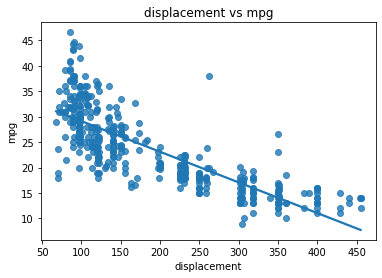

In [17]:
sns.regplot(x='displacement',y='mpg',data=df,ci=None)
plt.title("displacement vs mpg")

this graph shows that mpg is inversely proportional to displacement as the displacement incerases the mpg decreases 

Text(0.5, 1.0, 'horsepower vs mpg')

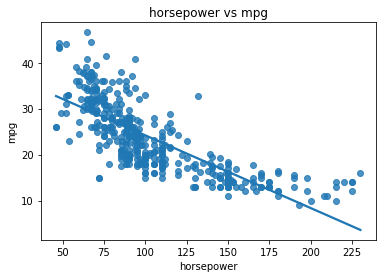

In [18]:
sns.regplot(x='horsepower',y='mpg',data=df,ci=None)
plt.title("horsepower vs mpg")

this graph also shows that mpg is inversely proportional to horsepower as the horsepower incerases the mpg decreases 

Text(0.5, 1.0, 'weight vs mpg')

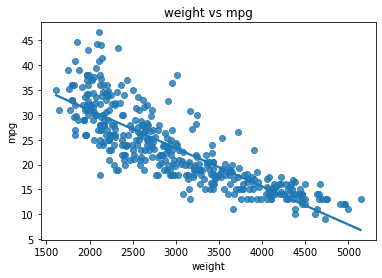

In [19]:
sns.regplot(x='weight',y='mpg',data=df,ci=None)
plt.title("weight vs mpg")

this graph also has a inverse relation as weight increases the mpg decreases

Text(0.5, 1.0, 'acceleration vs mpg')

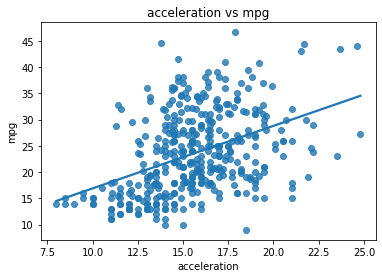

In [20]:
sns.regplot(x='acceleration',y='mpg',data=df,ci=None)
plt.title("acceleration vs mpg")

this graph shows that acceleration doesn't form a good relationship with mpg as the points are scttered in large amount and the RMS value will we very high

In [21]:
#acceleration doesn't seems to be a good predictor of mpg as data is randomly destributed
df[['acceleration','mpg']].corr()

,acceleration,mpg
acceleration,1.000000,0.420289
mpg,0.420289,1.000000


In [22]:
print(df['model year'].nunique())
print(df[['model year','mpg']].corr())

13
            model year       mpg
model year    1.000000  0.579267
mpg           0.579267  1.000000


Text(0.5, 1.0, 'model year vs mpg')

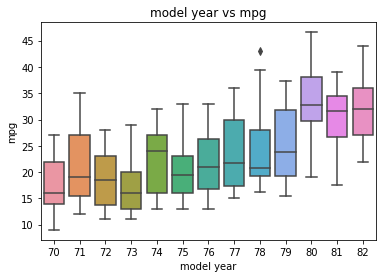

In [23]:
sns.boxplot(x='model year',y='mpg',data=df)
plt.title("model year vs mpg")

this graph shows that model year also has a pretty good relationship with mpg as the plots are bit distributed

In [24]:
print(df['origin'].nunique())
print(df[['origin','mpg']].corr())

3
         origin      mpg
origin  1.00000  0.56345
mpg     0.56345  1.00000


Text(0.5, 1.0, 'origin vs mpg')

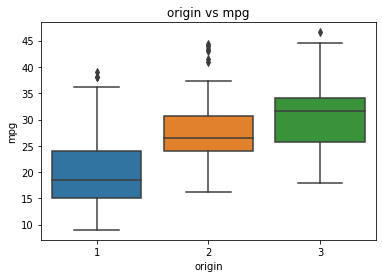

In [25]:
sns.boxplot(x='origin',y='mpg',data=df)
plt.title("origin vs mpg")

this graph shows that origin also has a pretty good relationship to predict mpg of a car

In [26]:
df['car name'].nunique()

305

In [27]:
#droping the column car name as it doesn't contribute in model prediction
df.drop('car name',axis=1,inplace=True)

In [28]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


# Model Development

## Linear Regression

In [29]:
X=df[['cylinders','displacement','horsepower','weight','model year','origin']]
Y=df['mpg']

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

applying linear regression

In [31]:
lm=LinearRegression()
lm.fit(X,Y)
Yhat=lm.predict(X)

In [32]:
print(lm.intercept_)
print(lm.coef_)

-15.881872297558644
[-0.43532699  0.01820559 -0.02061264 -0.00639302  0.75192415  1.4214872 ]


Text(0.5, 0, 'mpg')

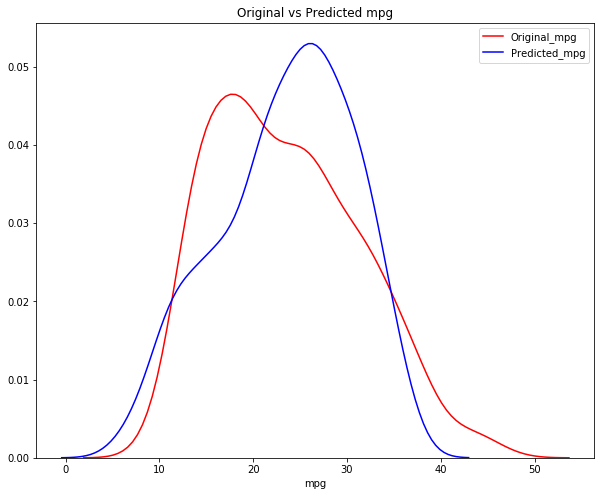

In [33]:
plt.figure(figsize=(10,8))
ax1=sns.distplot(Y,hist=False,label="Original_mpg",color='r')
sns.distplot(Yhat,hist=False,label="Predicted_mpg",color='b',ax=ax1)
plt.title("Original vs Predicted mpg")
plt.xlabel("mpg")

this graph shows that predicted mpg value is much higher then the actual value there is a large differenve in the values and the predicted curve doesn't fit the actual curve this is the condition of underfitting 

In [34]:
#applying linear regression without mode year and origin columns

In [35]:
X=df[['cylinders','displacement','horsepower','weight']]
Y=df['mpg']

In [36]:
lm=LinearRegression()
lm.fit(X,Y)
Yhat=lm.predict(X)

In [37]:
print(lm.intercept_)
print(lm.coef_)

45.76121850168994
[-0.3579547  -0.00099435 -0.03956999 -0.00537783]


Text(0.5, 1.0, 'Original vs Predicted mpg')

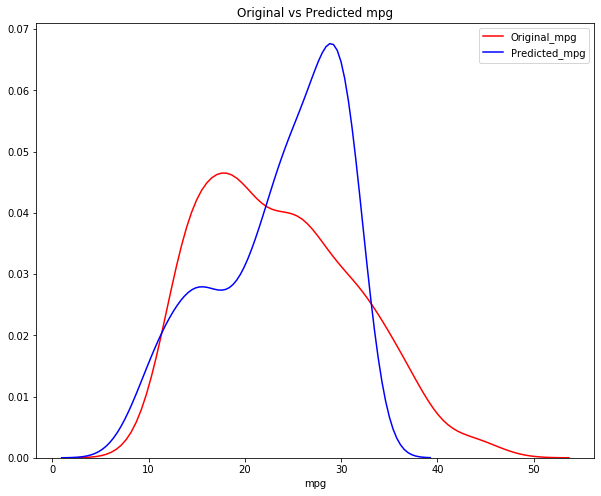

In [38]:
plt.figure(figsize=(10,8))
ax1=sns.distplot(Y,hist=False,label="Original_mpg",color='r')
sns.distplot(Yhat,hist=False,label="Predicted_mpg",color='b',ax=ax1)
plt.title("Original vs Predicted mpg")

this graph has much large difference between the predicted and actual values so mode year and origin from a part in model development

# Polynomial Regression

In [39]:
# checking for polynomial fit

In [40]:
x=df['displacement']
y=df['mpg']
f=np.polyfit(x,y,2)
p=np.poly1d(f)
p

poly1d([ 1.71523386e-04, -1.39442501e-01,  4.22089081e+01])

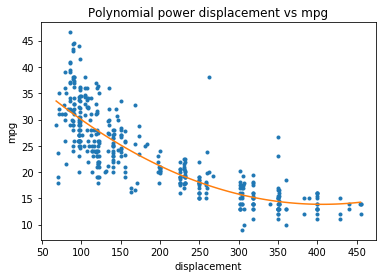

In [41]:
x_new=np.linspace(df['displacement'].min(),df['displacement'].max(),100)
#polynomial values of degree 2 of the new values
y_new=p(x_new)
plt.plot(x,y,'.',x_new,y_new,'-')
plt.title("Polynomial power displacement vs mpg")
plt.xlabel("displacement")
plt.ylabel("mpg")
plt.show()

this graph shows that polynomial line fit more accuratly in the data as mpg and displacement have inverse relationship

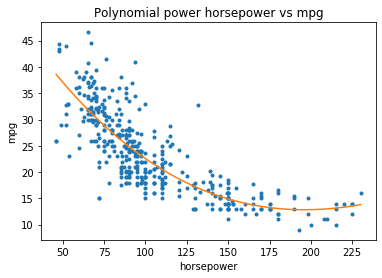

In [42]:
x=df['horsepower']
y=df['mpg']
f=np.polyfit(x,y,3)
p=np.poly1d(f)
x_new=np.linspace(df['horsepower'].max(),df['horsepower'].min(),100)
y_new=p(x_new)
plt.plot(x,y,'.',x_new,y_new,'-')
plt.title("Polynomial power horsepower vs mpg")
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.show()

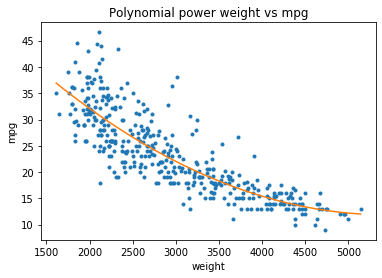

In [43]:
x=df['weight']
y=df['mpg']
f=np.polyfit(x,y,3)
p=np.poly1d(f)
x_new=np.linspace(df['weight'].max(),df['weight'].min(),100)
y_new=p(x_new)
plt.plot(x,y,'.',x_new,y_new,'-')
plt.title("Polynomial power weight vs mpg")
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()

above observation shows that polynomial values fit much better then the linear values hence polynomial regression can give more accuracy then linear model

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
pr=PolynomialFeatures(degree=3)

In [46]:
z_pr=pr.fit_transform(df[['displacement','horsepower','weight','cylinders','origin','model year']])

In [47]:
pr.fit(z_pr,df['mpg'])

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [48]:
z_pr.shape

(398, 84)

In [49]:
lm.fit(z_pr,df['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y_pr=lm.predict(z_pr)

Text(0.5, 1.0, 'Original vs Predicted mpg')

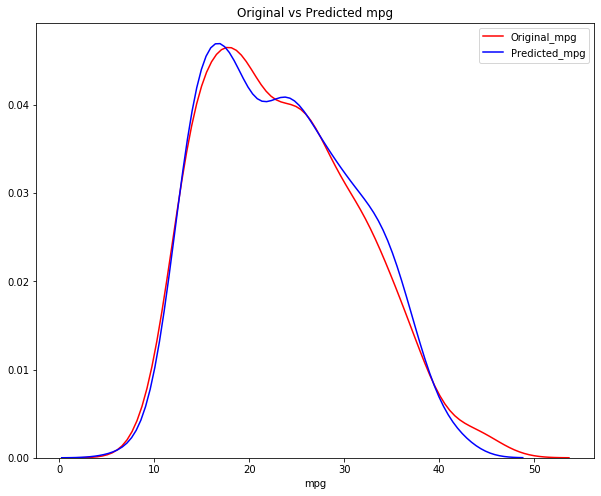

In [51]:
plt.figure(figsize=(10,8))
ax1=sns.distplot(df['mpg'],hist=False,label="Original_mpg",color='r')
sns.distplot(y_pr,hist=False,label="Predicted_mpg",color='b',ax=ax1)
plt.title("Original vs Predicted mpg")

the graph shows that polynomial regression fit much better then linear regression both the curves almost overlapped each other
and formed a good fit model

In [52]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['mpg'],y_pr)

4.606590551696835

the mean squared value of original and predicted value is much less in case of Polynimial regression

In [53]:
#spliting data into training and test data

# linear regression

In [54]:
features=df.drop(df[['mpg','acceleration']],axis=1)
mpg=df['mpg']

In [55]:
x_train,x_test,y_train,y_test=train_test_split(features,mpg,test_size=0.3,random_state=1)

In [56]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
Yhat=lm.predict(x_train)

In [58]:
Yhat_test=lm.predict(x_test)

Text(0.5, 1.0, 'Original vs Predicted mpg (Train Data)')

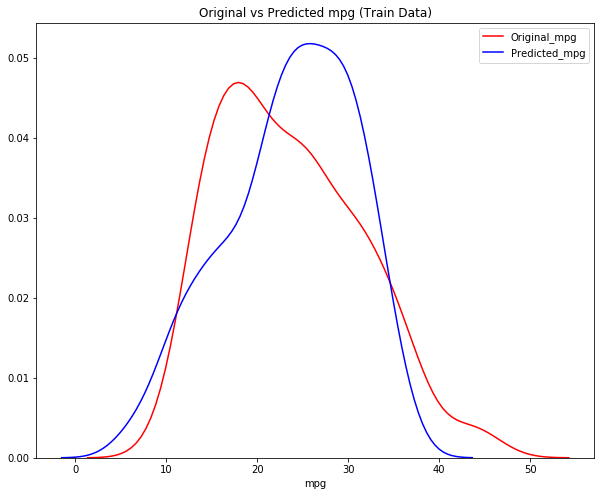

In [59]:
plt.figure(figsize=(10,8))
ax1=sns.distplot(y_train,hist=False,label="Original_mpg",color='r')
sns.distplot(Yhat,hist=False,label="Predicted_mpg",color='b',ax=ax1)
plt.title("Original vs Predicted mpg (Train Data)")

Text(0.5, 1.0, 'Original vs Predicted mpg (Test Data)')

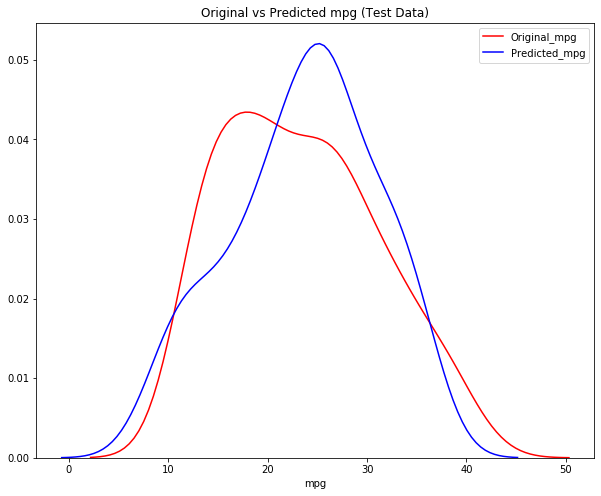

In [60]:
plt.figure(figsize=(10,8))
ax1=sns.distplot(y_test,hist=False,label="Original_mpg",color='r')
sns.distplot(Yhat_test,hist=False,label="Predicted_mpg",color='b',ax=ax1)
plt.title("Original vs Predicted mpg (Test Data)")

In [77]:
#mean squared error of test data actual values and predicted values using linear regression
mean_squared_error(Yhat_test,y_test)

8.992149546402015

In [78]:
# R2 score
lm.score(x_test,y_test)

0.8462011302443643

# Polynomisl regression 

In [63]:
features=df.drop(df[['mpg','acceleration']],axis=1)
mpg=df['mpg']

In [64]:
#spliting the polynomial fit_transformed data into test and training data 

In [65]:
x_train_p,x_test_p,y_train_p,y_test_p=train_test_split(features,mpg,test_size=0.3,random_state=1)

In [66]:
x_train_pr=pr.fit_transform(x_train_p)
x_test_pr=pr.fit_transform(x_test_p)

In [67]:
pr.fit(x_train_pr,y_train_p)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [68]:
lm_p=LinearRegression()

In [69]:
lm_p.fit(x_train_pr,y_train_p)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
Yhat_p=lm_p.predict(x_train_pr)

In [71]:
pr.fit(x_test_pr,y_test_p)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [72]:
Yhat_test_p=lm_p.predict(x_test_pr)

Text(0.5, 1.0, 'Original vs Predicted mpg (Train Data)')

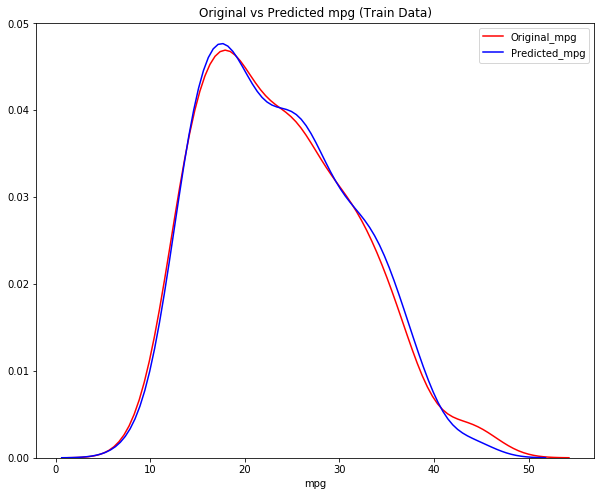

In [73]:
plt.figure(figsize=(10,8))
ax1=sns.distplot(y_train_p,hist=False,label="Original_mpg",color='r')
sns.distplot(Yhat_p,hist=False,label="Predicted_mpg",color='b',ax=ax1)
plt.title("Original vs Predicted mpg (Train Data)")

this graph shows a good fit between the actual value and predicted value

Text(0.5, 1.0, 'Original vs Predicted mpg (Test Data)')

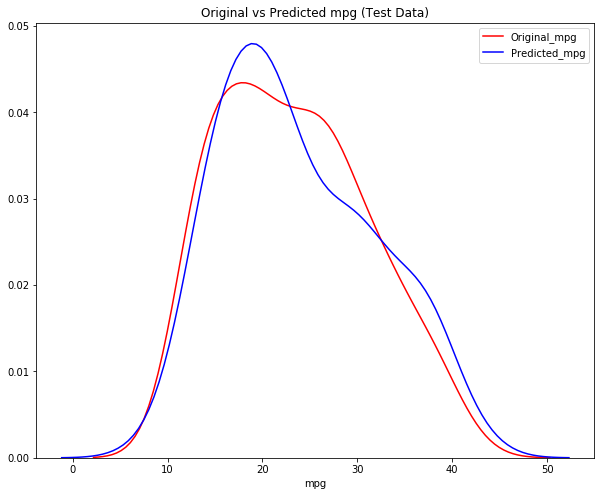

In [74]:
plt.figure(figsize=(10,8))
ax1=sns.distplot(y_test_p,hist=False,label="Original_mpg",color='r')
sns.distplot(Yhat_test_p,hist=False,label="Predicted_mpg",color='b',ax=ax1)
plt.title("Original vs Predicted mpg (Test Data)")

In [79]:
# Mean Squared Error for polynomial regression model
mean_squared_error(y_test_p,Yhat_test_p)

10.33385498471892

In [80]:
# R2 value for polynomial regression model
lm_p.score(x_test_pr,y_test_p)

0.8232530265797965